# Laboratorio 1

## Ejercicio 1

In [214]:
import numpy as np
from scipy.stats import norm
from scipy.integrate import quad # Calcula la integral
import matplotlib.pyplot as plt


np.random.seed(20)

In [74]:
def generate_data(n, mu1, mu2, sigma1, sigma2):
    data = np.zeros((n, 2))
    for i in range(n):
        c = np.random.randint(0, 1)
        if c == 0:
            x = np.random.normal(mu1, sigma1)
        else:
            x = np.random.normal(mu2, sigma2)
        data[i] = [x, c]
    return data

def bayes_error_empirical(data):
    n = len(data)
    correct = 0
    for i  in range(n):
        x,c = data[i]
        
        p0 = norm.pdf(x, mu1, sigma1)
        p1 = norm.pdf(x, mu2, sigma2)

        # Clasificación usando la probabilidad mayor
        predicted_class = 0 if p0 > p1 else 1
        if predicted_class == c:
            correct += 1
    return 1 - (correct / n)
    

def error_bayes(x):
    return norm.pdf(x, 1, 1)

def bayer_error_theroical(a,b):
    result, error = quad(error_bayes, a, b)
    return result

n_cases = [10, 20, 50, 100, 500, 1000, 5000]
mu_sigma_cases = [(0, 1, 1, 1), (0, 1, 1, 2)]

for mu1, mu2, sigma1, sigma2 in mu_sigma_cases:
    for n in n_cases:
        sample = generate_data(n, mu1, mu2, sigma1, sigma2)
        emp_error = bayes_error_empirical(sample)
        theor_error = bayer_error_theroical(0,np.inf)
        print(theor_error)
        print(f"n = {n}, mu1 = {mu1}, mu2 = {mu2}, sigma1 = {sigma1}, sigma2 = {sigma2}, emp_error = {emp_error}")

0.8413447460685435
n = 10, mu1 = 0, mu2 = 1, sigma1 = 1, sigma2 = 1, emp_error = 0.19999999999999996
0.8413447460685435
n = 20, mu1 = 0, mu2 = 1, sigma1 = 1, sigma2 = 1, emp_error = 0.19999999999999996
0.8413447460685435
n = 50, mu1 = 0, mu2 = 1, sigma1 = 1, sigma2 = 1, emp_error = 0.36
0.8413447460685435
n = 100, mu1 = 0, mu2 = 1, sigma1 = 1, sigma2 = 1, emp_error = 0.29000000000000004
0.8413447460685435
n = 500, mu1 = 0, mu2 = 1, sigma1 = 1, sigma2 = 1, emp_error = 0.32199999999999995
0.8413447460685435
n = 1000, mu1 = 0, mu2 = 1, sigma1 = 1, sigma2 = 1, emp_error = 0.32399999999999995
0.8413447460685435
n = 5000, mu1 = 0, mu2 = 1, sigma1 = 1, sigma2 = 1, emp_error = 0.29900000000000004
0.8413447460685435
n = 10, mu1 = 0, mu2 = 1, sigma1 = 1, sigma2 = 2, emp_error = 0.0
0.8413447460685435
n = 20, mu1 = 0, mu2 = 1, sigma1 = 1, sigma2 = 2, emp_error = 0.15000000000000002
0.8413447460685435
n = 50, mu1 = 0, mu2 = 1, sigma1 = 1, sigma2 = 2, emp_error = 0.12
0.8413447460685435
n = 100, mu

In [32]:
def calcular_integral(mu,sigma,limite,positiva):
    
    def p_x(x):
        return norm.pdf(x, mu, sigma)
    
    if positiva:
        integral, _ = quad(p_x, limite, np.inf)
        return integral
    else:
        integral, _ = quad(p_x, -np.inf, limite)
        return integral

In [33]:
import numpy as np

def encontrar_punto_corte(mu0,mu1,sigma0,sigma1):
    # Resolver la ecuación cuadrática (a(X)^2 + b(X) + c = 0) para (X)
    a = sigma1**2 - sigma0**2
    b = 2 * (mu0 * sigma1**2 - mu1 * sigma0**2)
    c = (mu1**2 * sigma0**2) - (mu0**2 * sigma1**2) - 2 * sigma0**2 * sigma1**2 * np.log(sigma1 / sigma0)
    
    # Obtener las soluciones
    if a != 0:
        discriminant = b**2 - 4 * a * c
        if discriminant >= 0:
            x1 = (-b + np.sqrt(discriminant)) / (2 * a)
            x2 = (-b - np.sqrt(discriminant)) / (2 * a)
            return x1,x2
        else:
            return None
    else:
        # Caso especial: cuando a = 0, la ecuación es lineal.
        if b != 0:
            x = -c / b
            return x
        else:
            return None


In [45]:
def bayer_error_theroical(mu0,mu1,sigma0,sigma1,p0,p1):
    corte = encontrar_punto_corte(mu0,mu1,sigma0,sigma1)
    if(type(corte) == np.float64):
        if(corte > mu0):
            prob_0 = calcular_integral(mu0,sigma0,corte,True)*p0
        else:
            prob_0 = calcular_integral(mu0,sigma0,corte,False)*p0
            
        if(corte > mu1):
            prob_1 = calcular_integral(mu1,sigma1,corte,True)*p1
        else:
            prob_1 = calcular_integral(mu1,sigma1,corte,False)*p1
    elif(type(corte) == tuple):
        pass
    else:
        pass
    return prob_0+prob_1

In [44]:
bayer_error_theroical(0,1,1,1,0.5,0.5)

0.30853753872598694

### HACIA ABAJO PLAYGROUND

In [3]:
import numpy as np
import scipy.stats as stats
from scipy.integrate import quad

# Parámetros de la distribución
mu0 = 0  # media
sigma0 = 1  # desviación estándar

# Función de densidad de probabilidad
def p_x(x):
    return stats.norm.pdf(x, mu0, sigma0)

# Cálculo de la integral desde 0 hasta infinito
integral, error = quad(p_x, 0.5, np.inf)

print(f'Integral de la distribución normal desde 0 hasta ∞: {integral}')
print(f'Error estimado: {error}')


Integral de la distribución normal desde 0 hasta ∞: 0.30853753872598694
Error estimado: 6.28946569227119e-10


In [13]:
encontrar_punto_corte(0,1,1,2)

(1.608547142571206, -0.9418804759045392)

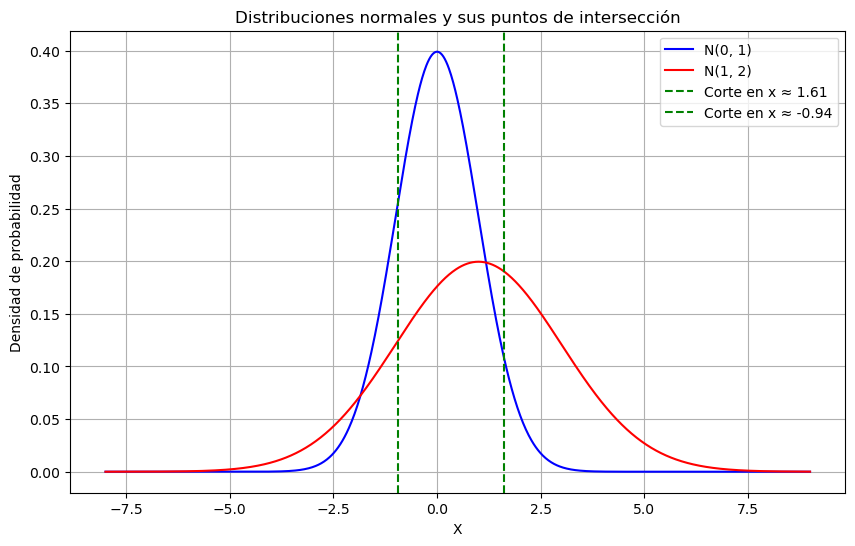

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import fsolve

# Función para graficar las distribuciones y el punto de intersección
def plot_normal_distributions(mu0, sigma0, mu1, sigma1):
    # Definir el rango de X basado en las medias y desviaciones estándar
    x_min = min(mu0, mu1) - 4 * max(sigma0, sigma1)
    x_max = max(mu0, mu1) + 4 * max(sigma0, sigma1)
    x = np.linspace(x_min, x_max, 1000)

    # Funciones de densidad de probabilidad
    p_x_c0 = norm.pdf(x, mu0, sigma0)
    p_x_c1 = norm.pdf(x, mu1, sigma1)

    # Encontrar los puntos de intersección
    x0 = norm.pdf(x, mu0, sigma0)
    x1 = norm.pdf(x, mu1, sigma1)
    
    corte = encontrar_punto_corte(mu0,mu1,sigma0,sigma1)
    
    # Graficar las distribuciones
    plt.figure(figsize=(10, 6))
    plt.plot(x, p_x_c0, label=f'N({mu0}, {sigma0})', color='blue')
    plt.plot(x, p_x_c1, label=f'N({mu1}, {sigma1})', color='red')
    if(type(corte) == tuple):
        plt.axvline(x=corte[0], color='green', linestyle='--', label=f'Corte en x ≈ {corte[0]:.2f}')
        plt.axvline(x=corte[1], color='green', linestyle='--', label=f'Corte en x ≈ {corte[1]:.2f}')
    elif(type(corte) == float):
        plt.axvline(x=corte, color='green', linestyle='--', label=f'Corte en x ≈ {corte:.2f}')
    
    
    # Etiquetas y leyenda
    plt.xlabel('X')
    plt.ylabel('Densidad de probabilidad')
    plt.title('Distribuciones normales y sus puntos de intersección')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejemplo de uso
mu0 = 0
sigma0 = 1
mu1 = 1
sigma1 = 2

plot_normal_distributions(mu0, sigma0, mu1, sigma1)


No decision boundary found. Adjust parameters.
Theoretical Bayes Error Rate: 0.0000
No decision boundary to plot.


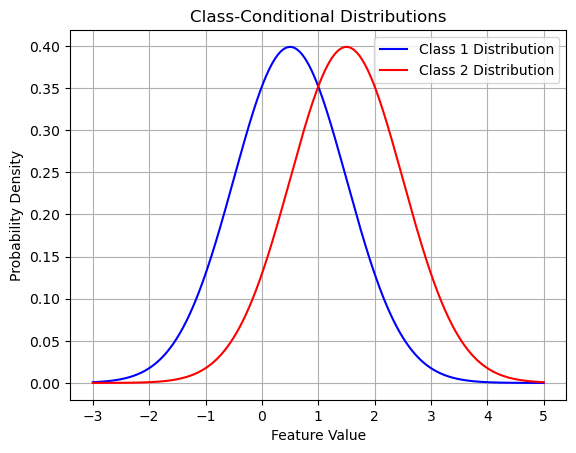

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad

# Adjusted Parameters for the two Gaussian distributions
mu1 = 0.5      # Mean of class 1 (closer to class 2)
sigma1 = 1     # Standard deviation of class 1
mu2 = 1.5      # Mean of class 2 (closer to class 1)
sigma2 = 1     # Standard deviation of class 2

# Prior probabilities
p1 = 0.5  # Prior for class 1
p2 = 0.5  # Prior for class 2

# Define the class-conditional distributions
def p_x_given_y1(x):
    return norm.pdf(x, mu1, sigma1)

def p_x_given_y2(x):
    return norm.pdf(x, mu2, sigma2)

# Function to calculate the decision boundary
def decision_boundary():
    # Set up an array of x values
    x_values = np.linspace(-3, 5, 1000)
    p1_values = p_x_given_y1(x_values)
    p2_values = p_x_given_y2(x_values)

    # Find the decision boundary where the two distributions are approximately equal
    idx = np.where(np.isclose(p1_values, p2_values, atol=1e-6))[0]
    
    # Return boundary points if found, else return an empty array
    return x_values[idx] if len(idx) > 0 else np.array([])

# Calculate the Bayes error
def bayes_error():
    boundary_x = decision_boundary()
    if len(boundary_x) == 0:
        print("No decision boundary found. Adjust parameters.")
        return 0  # No decision boundary found

    # Get the decision boundary point
    x1, x2 = boundary_x[0], boundary_x[-1]

    # Integrate the areas where the classification will be wrong
    error1, _ = quad(lambda x: p_x_given_y1(x) * p2, -np.inf, x1)
    error2, _ = quad(lambda x: p_x_given_y2(x) * p1, x2, np.inf)

    # Total Bayes error
    return error1 + error2

# Calculate the theoretical Bayes error
error_rate = bayes_error()
print(f"Theoretical Bayes Error Rate: {error_rate:.4f}")

# Plotting the distributions
x = np.linspace(-3, 5, 1000)
plt.plot(x, p_x_given_y1(x), label='Class 1 Distribution', color='blue')
plt.plot(x, p_x_given_y2(x), label='Class 2 Distribution', color='red')

# Safely get the decision boundary
boundary_x = decision_boundary()
if len(boundary_x) > 0:
    plt.axvline(x=boundary_x[0], color='green', linestyle='--', label='Decision Boundary')
else:
    print("No decision boundary to plot.")

plt.title('Class-Conditional Distributions')
plt.xlabel('Feature Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()


## Ejercicio 2

In [246]:
def generate_data(n, mu1, mu2, sigma1, sigma2):
    data = np.zeros((n, 2))
    for i in range(n):
        c = np.random.randint(0, 1)
        if c == 0:
            x = np.random.normal(mu1, sigma1)
        else:
            x = np.random.normal(mu2, sigma2)
        data[i] = [x, c]
    return data



In [247]:
import numpy as np

def generar_x(cantidad):
    part1 = np.random.uniform(0, 1, (cantidad, 5))
    part2 = np.random.uniform(100, 1000, (cantidad, 5))

    return np.hstack((part1, part2))

matrix_train = generar_x(100)
matrix_test = generar_x(1000)
w = np.random.rand(10).reshape(10,1) # Una por cada variable / Es el "modelo"
epsilon = np.random.normal(0,1,size=100).reshape(100,1) # Esto es ruido

y = np.dot(matrix_train,w)+epsilon

In [248]:
import pandas as pd

data = pd.DataFrame(matrix_train, columns=[f'x{i+1}' for i in range(matrix_train.shape[1])])  # Nombre de columnas x1, x2, ...
data['y'] = y  # Añadir la columna y al DataFrame

# Mostrar la tabla
display(data)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.375042,0.291967,0.135172,0.771493,0.569204,527.737666,428.399847,658.299242,583.767455,781.784404,1421.825171
1,0.999332,0.023347,0.306400,0.939624,0.140752,487.120606,597.380604,102.975376,535.837690,198.118231,1041.974719
2,0.697918,0.488802,0.148076,0.626053,0.829135,777.470444,625.173612,493.093303,335.428027,595.490599,1496.343506
3,0.552691,0.207539,0.281311,0.776010,0.891694,889.216225,190.130309,259.386778,463.942142,119.380288,1187.421919
4,0.795831,0.936131,0.295760,0.275763,0.361927,104.087973,424.262228,387.814495,989.798619,951.638040,1280.676843
...,...,...,...,...,...,...,...,...,...,...,...
95,0.575515,0.577130,0.251678,0.166954,0.675000,803.631992,231.346765,879.575856,310.608930,778.351559,1494.246034
96,0.177515,0.724717,0.778792,0.756519,0.570900,348.744042,803.162453,450.237912,761.558172,121.960969,1087.447567
97,0.284910,0.109605,0.602166,0.667412,0.132562,176.152697,823.522581,106.793933,200.423079,480.678718,861.468714
98,0.033660,0.393149,0.064322,0.035292,0.229727,150.042186,887.783579,242.770977,103.375904,692.739869,956.061103


In [249]:
w_best = np.dot(np.dot(np.linalg.inv(np.dot(matrix_train.T,matrix_train)),matrix_train.T),y)
w_best

array([[-0.2495939 ],
       [ 0.3161419 ],
       [-0.22596839],
       [ 1.38483811],
       [ 0.28341203],
       [ 0.9141692 ],
       [ 0.39530602],
       [ 0.0983442 ],
       [ 0.43871305],
       [ 0.57310953]])

In [250]:
def calcular_error_test(w_original, w_best, matrix_test):
    y_test = np.dot(matrix_test,w_original)
    y_test_best = np.dot(matrix_test,w_best)
    return np.mean((y_test-y_test_best)**2) # Error cuadratico medio

In [251]:
error_best = calcular_error_test(w, w_best, matrix_test)

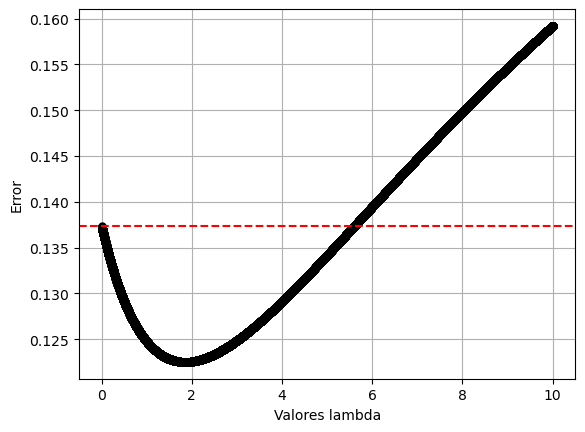

Landa optimo: 1.8523


In [252]:
erores_test_landa = np.array([])
valores_landa = np.arange(0,10,0.0001)

for i in valores_landa:
    w_landa = np.dot(np.dot(np.linalg.inv(np.dot(matrix_train.T,matrix_train)+i*np.eye(10)),matrix_train.T),y)
    erores_test_landa = np.append(erores_test_landa, calcular_error_test(w, w_landa, matrix_test))
    

# Crear un gráfico de línea
plt.plot(valores_landa, erores_test_landa, marker='o', linestyle='None', color='black', markersize=5)  # Usar marcadores en los puntos
plt.axhline(y=error_best, color='red', linestyle='--', linewidth=1.5)  # Línea horizontal en y = 5
plt.xlabel("Valores lambda")
plt.ylabel("Error")
plt.grid(True)
plt.show()

optimar_landa = valores_landa[np.argmin(erores_test_landa)]
print("Landa optimo: {}".format(optimar_landa))


#### Extensión

In [289]:
X_total = np.vstack((matrix_train,matrix_test))

U, sigma, V_T = np.linalg.svd(X_total)

num_singular_values = len(sigma)

if num_singular_values >= 3:
    indices = np.argsort(sigma)

    sigma[indices[0]] *= 1e-5
    sigma[indices[1]] *= 1e-5
    sigma[indices[2]] *= 1e-5

sigma_modified = np.zeros_like(X_total, dtype=float)
np.fill_diagonal(sigma_modified, sigma)

# Reconstruct the original matrix with modified singular values
matrix_train_reconstruida = np.dot(np.dot(U,sigma_modified),V_T)

matrix_train_reconstruida = X_total[:100,:] 
matrix_test_reconstruida = X_total[100:,:]

In [290]:
# epsilon aleatorio
# w aleatoria
# volver a calcular las w buena
w_rand_1 = np.random.rand(10).reshape(10,1) # Una por cada variable / Es el "modelo"
w_rand_2 = np.random.rand(10).reshape(10,1) # Una por cada variable / Es el "modelo"


epsilon_2 = np.random.normal(0,1,size=100).reshape(100,1) # Esto es ruido
epsilon_1 = np.random.normal(0,1,size=100).reshape(100,1) # Esto es ruido

y_1 = np.dot(matrix_train,w_rand_1)+epsilon_1
y_2 = np.dot(matrix_train,w_rand_2)+epsilon_2

w_1 = np.dot(np.dot(np.linalg.inv(np.dot(matrix_train_reconstruida.T,matrix_train_reconstruida)),matrix_train_reconstruida.T),y_1)
w_2 = np.dot(np.dot(np.linalg.inv(np.dot(matrix_train_reconstruida.T,matrix_train_reconstruida)),matrix_train_reconstruida.T),y_2)

display(pd.DataFrame({
            'Sample 1': w_1.flatten(),
            'Sample 2': w_2.flatten(),
            'Diferencia': w_1.flatten()-w_2.flatten()
        }))

,Sample 1,Sample 2,Diferencia
0,0.660912,0.384161,0.276750
1,0.550602,0.757796,-0.207194
2,0.425571,0.429177,-0.003606
3,0.190955,0.373760,-0.182805
4,0.495771,0.551517,-0.055747
5,0.625446,0.736069,-0.110623
6,0.518329,0.217130,0.301200
7,0.935194,0.616949,0.318245
8,0.510579,0.329237,0.181342
9,0.638060,0.087800,0.550260


In [291]:
w_best_1 = np.dot(np.dot(np.linalg.inv(np.dot(matrix_train_reconstruida.T,matrix_train_reconstruida)),matrix_train_reconstruida.T),y_1)
w_best_2 = np.dot(np.dot(np.linalg.inv(np.dot(matrix_train_reconstruida.T,matrix_train_reconstruida)),matrix_train_reconstruida.T),y_2)

error_best_1 = calcular_error_test(w_rand_1, w_best_1, matrix_test_reconstruida)
error_best_2 = calcular_error_test(w_rand_2, w_best_2, matrix_test_reconstruida)

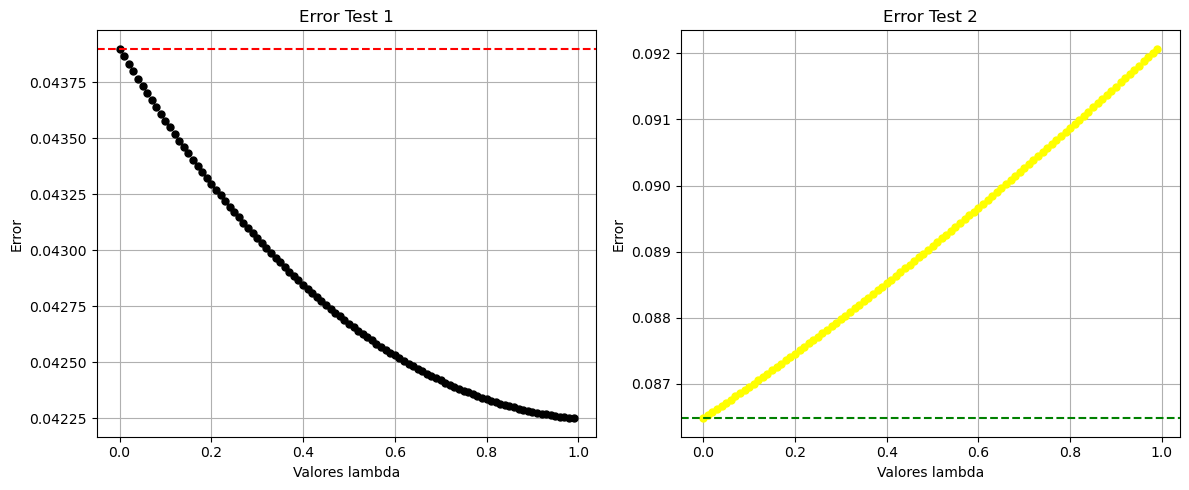

Landa optimo 1: 0.99
Landa optimo 2: 0.0


In [293]:
erores_test_landa_1 = np.array([])
erores_test_landa_2 = np.array([])
valores_landa = np.arange(0,1,0.01)

for i in valores_landa:
    w_landa_1 = np.dot(np.dot(np.linalg.inv(np.dot(matrix_train_reconstruida.T,matrix_train_reconstruida)+i*np.eye(10)),matrix_train_reconstruida.T),y_1)
    w_landa_2 = np.dot(np.dot(np.linalg.inv(np.dot(matrix_train_reconstruida.T,matrix_train_reconstruida)+i*np.eye(10)),matrix_train_reconstruida.T),y_2)
    erores_test_landa_1 = np.append(erores_test_landa_1, calcular_error_test(w_rand_1, w_landa_1, matrix_test_reconstruida))
    erores_test_landa_2 = np.append(erores_test_landa_2, calcular_error_test(w_rand_2, w_landa_2, matrix_test_reconstruida))
    

# Crear un gráfico de línea
plt.figure(figsize=(12, 5))  # Ajustar el tamaño de la figura

# Primer gráfico
plt.subplot(1, 2, 1)  # (nrows, ncols, index)
plt.plot(valores_landa, erores_test_landa_1, marker='o', linestyle='None', color='black', markersize=5)
plt.axhline(y=error_best_1, color='red', linestyle='--', linewidth=1.5)
plt.title('Error Test 1')  # Título del primer gráfico
plt.xlabel("Valores lambda")
plt.ylabel("Error")
plt.grid(True)

# Segundo gráfico
plt.subplot(1, 2, 2)  # (nrows, ncols, index)
plt.plot(valores_landa, erores_test_landa_2, marker='o', linestyle='None', color='yellow', markersize=5)
plt.axhline(y=error_best_2, color='green', linestyle='--', linewidth=1.5)
plt.title('Error Test 2')  # Título del segundo gráfico
plt.xlabel("Valores lambda")
plt.ylabel("Error")
plt.grid(True)

# Mostrar los gráficos
plt.tight_layout()  # Ajustar el espaciado entre gráficos
plt.show()

optimar_landa_1 = valores_landa[np.argmin(erores_test_landa_1)]
optimar_landa_2 = valores_landa[np.argmin(erores_test_landa_2)]
print("Landa optimo 1: {}".format(optimar_landa_1))
print("Landa optimo 2: {}".format(optimar_landa_2))